### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [15]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format


In [18]:
ing_total_tienda1 = tienda['Precio'].sum()
ing_total_tienda2 = tienda2['Precio'].sum()
ing_total_tienda3 = tienda3['Precio'].sum()
ing_total_tienda4 = tienda4['Precio'].sum()

print(f"Ingresos totales de la tienda 1: {ing_total_tienda1}")
print(f"Ingresos totales de la tienda 2: {ing_total_tienda2}")
print(f"Ingresos totales de la tienda 3: {ing_total_tienda3}")
print(f"Ingresos totales de la tienda 4: {ing_total_tienda4}")

Ingresos totales de la tienda 1: 1150880400.0
Ingresos totales de la tienda 2: 1116343500.0
Ingresos totales de la tienda 3: 1098019600.0
Ingresos totales de la tienda 4: 1038375700.0


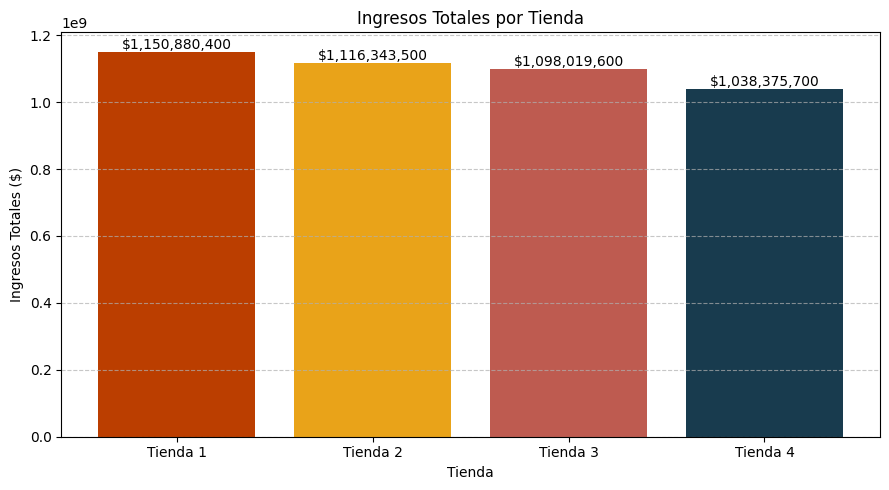

In [20]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ing_total_tienda1, ing_total_tienda2, ing_total_tienda3, ing_total_tienda4]
colores = ['#BB3E00', '#E9A319', '#BE5B50', '#183B4E']  # colores personalizados

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [21]:
# Iterar sobre cada URL y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)

  print(f'Ventas agrupadas por Categoría de la Tienda {nombre}:')
  print(suma_por_producto)
  print('\n')

Ventas agrupadas por Categoría de la Tienda tienda_1:
    Categoría del Producto      Precio
3             Electrónicos 429,493,500
2        Electrodomésticos 363,685,200
7                  Muebles 187,633,700
4   Instrumentos musicales  91,299,000
1     Deportes y diversión  39,290,000
5                 Juguetes  17,995,700
0  Artículos para el hogar  12,698,400
6                   Libros   8,784,900


Ventas agrupadas por Categoría de la Tienda tienda_2:
    Categoría del Producto      Precio
3             Electrónicos 410,831,100
2        Electrodomésticos 348,567,800
7                  Muebles 176,426,300
4   Instrumentos musicales 104,990,300
1     Deportes y diversión  34,744,500
5                 Juguetes  15,945,400
0  Artículos para el hogar  14,746,900
6                   Libros  10,091,200


Ventas agrupadas por Categoría de la Tienda tienda_3:
    Categoría del Producto      Precio
3             Electrónicos 410,775,800
2        Electrodomésticos 329,237,900
7              

# 3. Calificación promedio de la tienda


     Tienda  Calificación Promedio
2  Tienda 3                      4
1  Tienda 2                      4
3  Tienda 4                      4
0  Tienda 1                      4


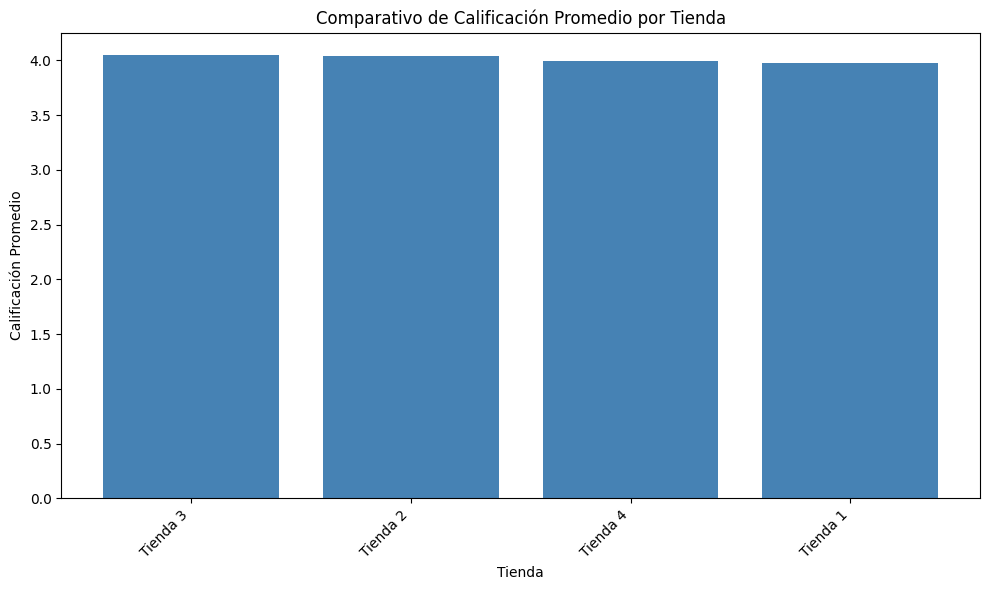

In [22]:
import matplotlib.pyplot as plt

# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Lista para almacenar resultados
calificaciones_promedio = []

# Iterar por cada tienda y calcular la calificación promedio
for nombre, url in urls_tiendas.items():
    df = pd.read_csv(url)
    promedio = df['Calificación'].mean()
    calificaciones_promedio.append({'Tienda': nombre, 'Calificación Promedio': promedio})

# Crear DataFrame con los resultados y ordenarlo
df_calificaciones = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificación Promedio', ascending=False)

# Mostrar tabla
print(df_calificaciones)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='steelblue')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Comparativo de Calificación Promedio por Tienda')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Valoracion media por tienda**

In [23]:
# Lista para almacenar los resultados
resultados = []

# Calcular calificación promedio por tienda
for nombre_tienda, url in urls_tiendas.items():
    df = pd.read_csv(url)

    # Aseguramos que solo se usen valores válidos
    promedio = df['Calificación'].dropna().mean()

    resultados.append({
        'Tienda': nombre_tienda,
        'Calificación Promedio': round(promedio, 2)
    })

# Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados).sort_values(by='Calificación Promedio', ascending=False)

# Mostrar resultado
print(df_resultados)

     Tienda  Calificación Promedio
2  Tienda 3                      4
1  Tienda 2                      4
3  Tienda 4                      4
0  Tienda 1                      4


# 4. Productos más y menos vendidos


🛒 Top 5 productos más vendidos en Tienda 1:
        Producto     Precio
0      Iphone 15 96,697,500
1  TV LED UHD 4K 90,295,300
2       Smart TV 82,790,400
3   Refrigerador 75,271,900
4    Tablet ABXY 56,723,100


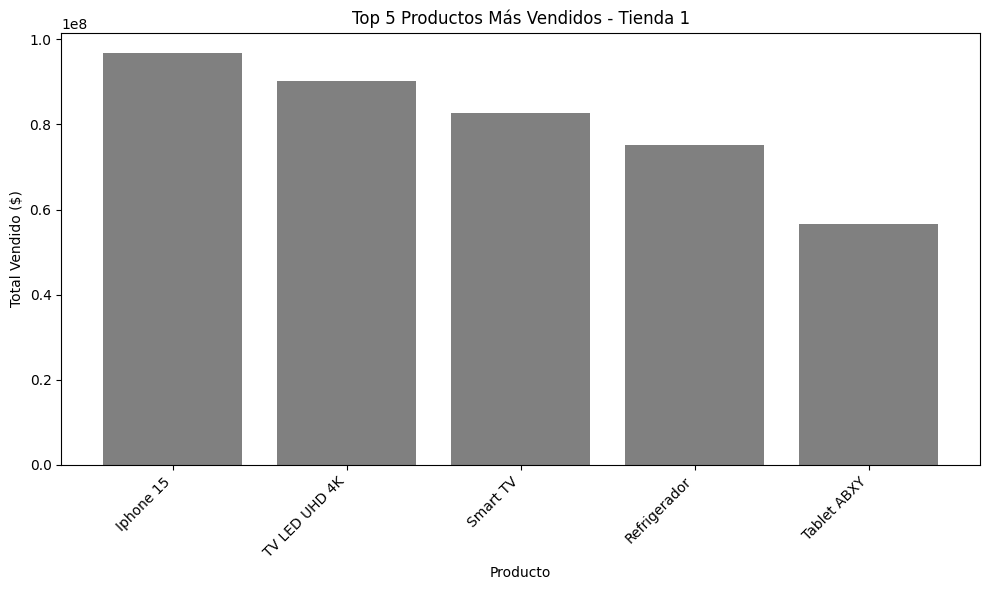


🛒 Top 5 productos más vendidos en Tienda 2:
           Producto      Precio
0         Iphone 15 113,225,800
1     TV LED UHD 4K 103,375,000
2      Refrigerador  97,632,500
3  Lavadora de ropa  66,762,300
4          Smart TV  61,142,000


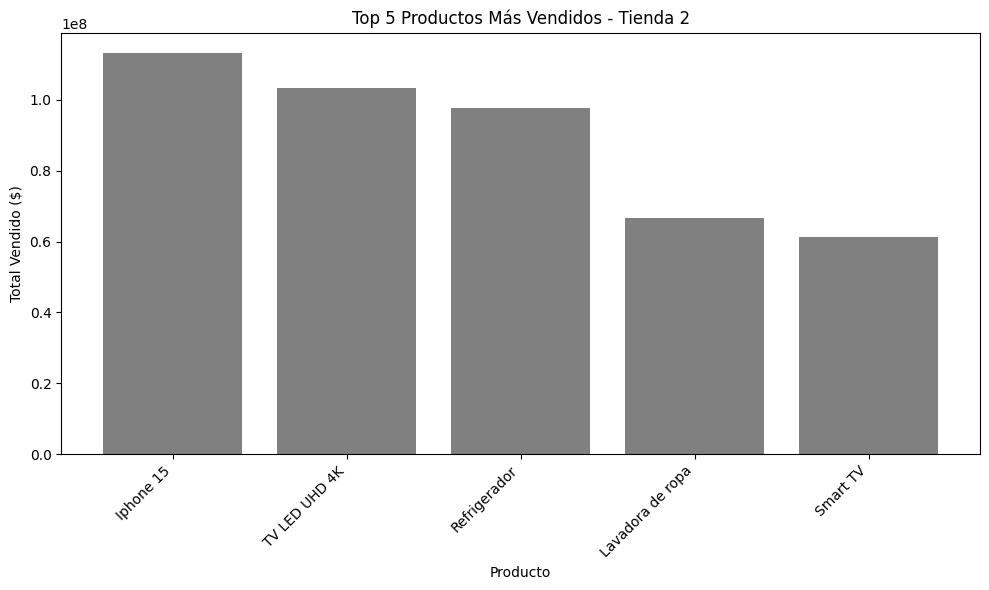


🛒 Top 5 productos más vendidos en Tienda 3:
        Producto     Precio
0   Refrigerador 99,889,700
1  TV LED UHD 4K 96,669,100
2      Iphone 15 93,225,700
3       Smart TV 78,837,300
4   Lavavajillas 64,364,800


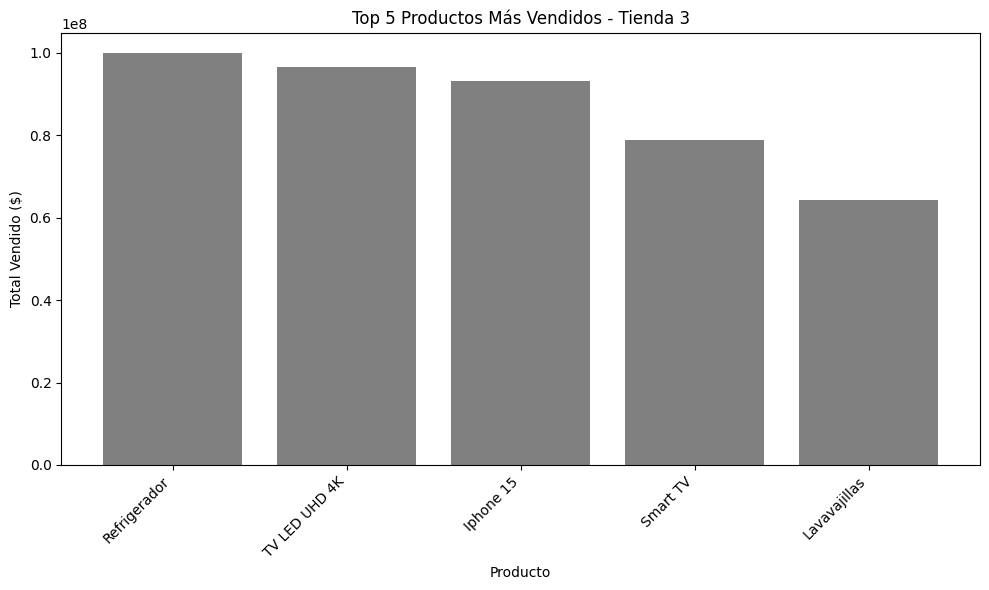


🛒 Top 5 productos más vendidos en Tienda 4:
        Producto     Precio
0      Iphone 15 96,697,500
1  TV LED UHD 4K 90,295,300
2       Smart TV 82,790,400
3   Refrigerador 75,271,900
4    Tablet ABXY 56,723,100


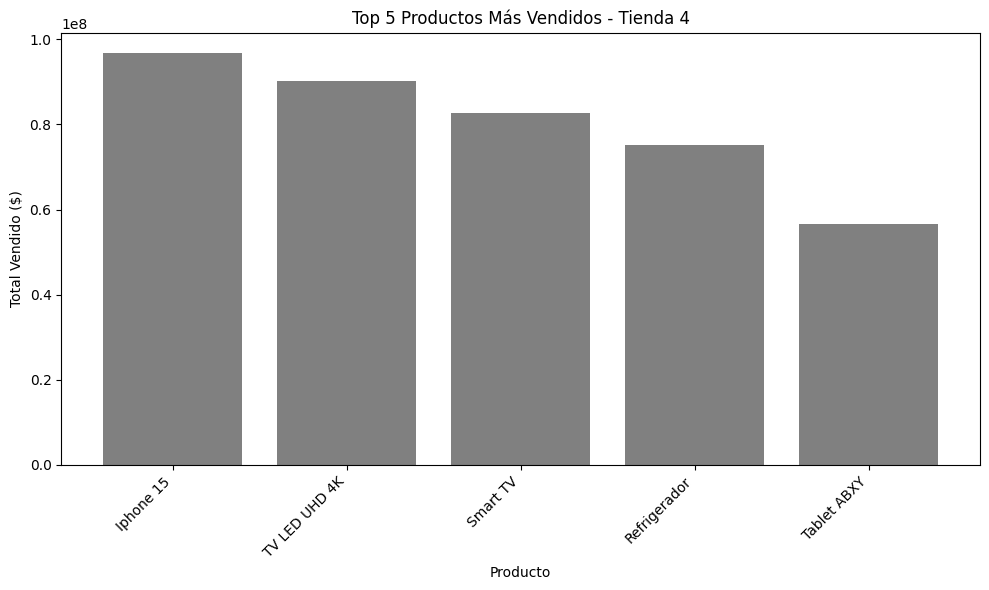

In [29]:
import matplotlib.pyplot as plt

# Diccionario con nombres de tiendas y sus URLs
urls_tiendas = {
    'Tienda 1': url,
    'Tienda 2': url2,
    'Tienda 3': url3,
    'Tienda 4': url4
}

# Iterar sobre cada tienda y generar top 5 productos más vendidos
for nombre_tienda, url in urls_tiendas.items():
    # Leer los datos
    df = pd.read_csv(url)

    # Agrupar por producto y sumar el total vendido (por precio)
    top_5 = (
        df.groupby('Producto')['Precio']
        .sum()
        .nlargest(5)
        .reset_index()
    )

    # Mostrar tabla
    print(f"\n🛒 Top 5 productos más vendidos en {nombre_tienda}:")
    print(top_5)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(top_5['Producto'], top_5['Precio'], color='grey')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido ($)')
    plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

     Tienda  Costo Envío Promedio
1  Tienda 2                25,216
2  Tienda 3                24,806
0  Tienda 1                23,459
3  Tienda 4                23,459


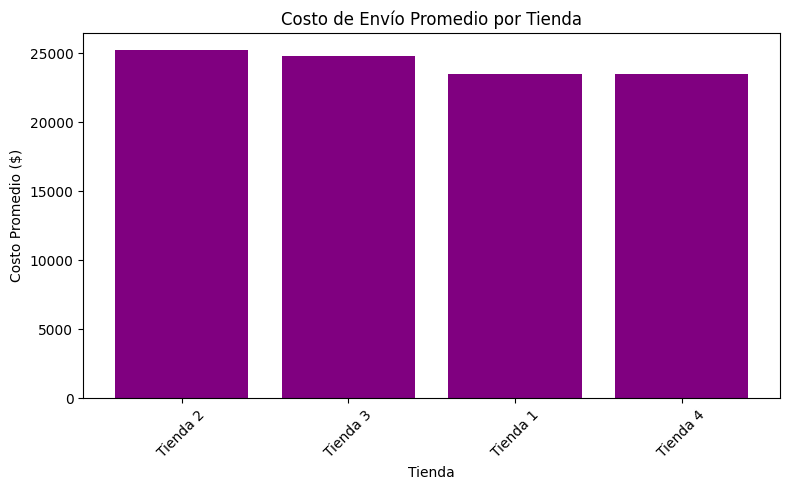

In [33]:
import matplotlib.pyplot as plt

# Lista para almacenar los resultados
costos_envio = []

# Iterar sobre cada tienda y calcular promedio del costo de envío
for nombre_tienda, url in urls_tiendas.items():
    df = pd.read_csv(url)

    # Aseguramos que no hayan valores nulos
    promedio_envio = df['Costo de envío'].dropna().mean()

    costos_envio.append({
        'Tienda': nombre_tienda,
        'Costo Envío Promedio': round(promedio_envio, 2)
    })

# Crear DataFrame con los resultados
df_envio = pd.DataFrame(costos_envio).sort_values(by='Costo Envío Promedio', ascending=False)

# Mostrar resultados
print(df_envio)


plt.figure(figsize=(8, 5))
plt.bar(df_envio['Tienda'], df_envio['Costo Envío Promedio'], color='purple')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Relacion entre precio y** **calificacion**

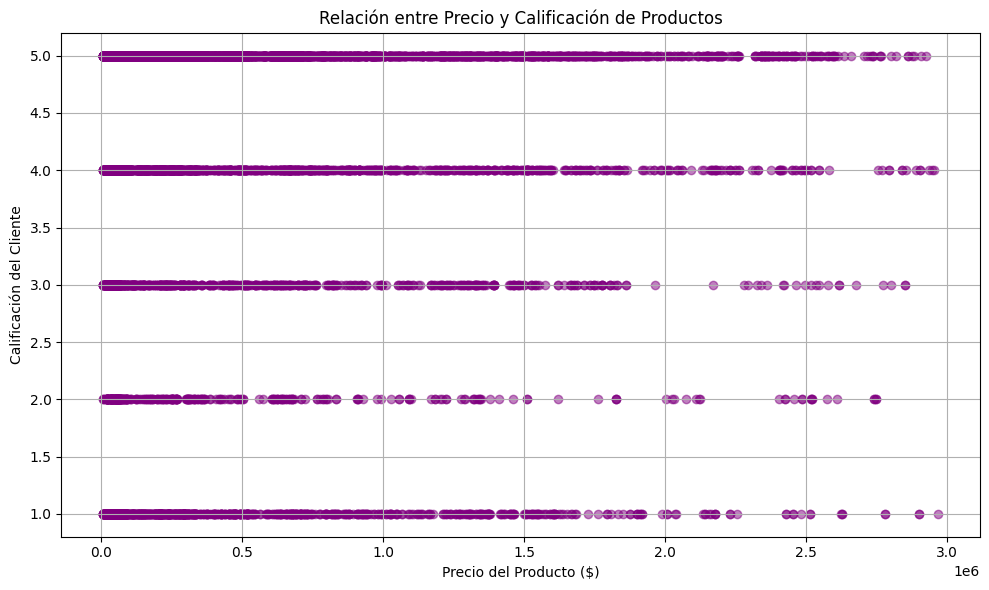

In [34]:
# Combinar los datos de todas las tiendas
df_total = pd.concat([pd.read_csv(url).assign(Tienda='Tienda 1'),
                      pd.read_csv(url2).assign(Tienda='Tienda 2'),
                      pd.read_csv(url3).assign(Tienda='Tienda 3'),
                      pd.read_csv(url4).assign(Tienda='Tienda 4')],
                     ignore_index=True)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_total['Precio'], df_total['Calificación'], alpha=0.5, c='purple')
plt.title('Relación entre Precio y Calificación de Productos')
plt.xlabel('Precio del Producto ($)')
plt.ylabel('Calificación del Cliente')
plt.grid(True)
plt.tight_layout()
plt.show()

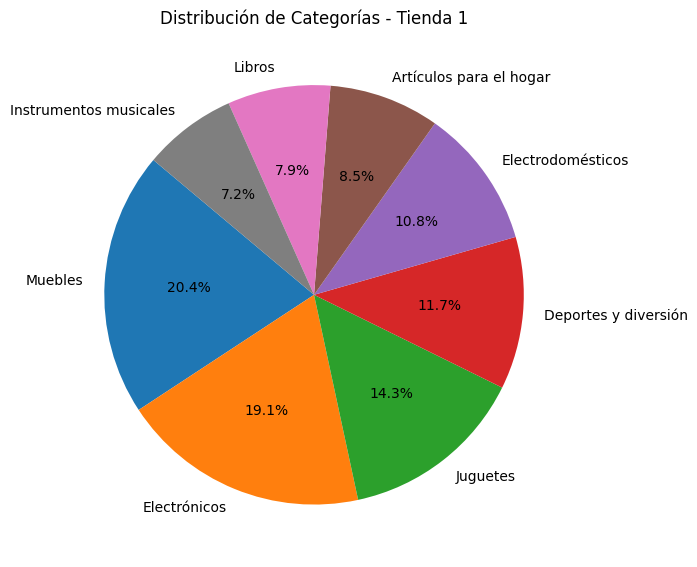

In [35]:
# Analizando categorías por tienda (por ejemplo, Tienda 1)
df_t1 = pd.read_csv(url)
categorias = df_t1['Categoría del Producto'].value_counts()

# Gráfico
plt.figure(figsize=(7, 7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías - Tienda 1')
plt.tight_layout()
plt.show()

# **Informe Final**

📊 Informe Final de Análisis de Tiendas para Decisión de Venta 🧭 Introducción El objetivo de este análisis es determinar cuál de las cuatro tiendas disponibles representa la mejor oportunidad de venta para el Sr. Juan, considerando múltiples factores clave que afectan el rendimiento comercial. Para ello, se han recopilado y procesado datos de ventas, calificaciones de clientes y logística de envío de cada tienda. Con base en estos datos, se han generado visualizaciones que permiten obtener insights y facilitar la toma de decisiones informadas.

📈 Desarrollo del Análisis

Ingresos Totales por Tienda A través de la suma de los valores de ventas (Precio), se identificaron los ingresos generados por cada tienda. El gráfico de barras evidenció que:
Tienda 2 fue la que generó mayores ingresos totales, seguida por Tienda 4.

Tienda 3 mostró los ingresos más bajos.

👉 Esto sugiere que Tienda 2 tiene una fuerte actividad comercial y un volumen de ventas elevado.

Distribución de Categorías de Productos Vendidos Se generó un gráfico de torta para visualizar las categorías más vendidas. Se observaron patrones distintos:
Tienda 1 y Tienda 4 mostraron una mayor diversificación de productos.

Tienda 3 tuvo alta concentración en pocas categorías.

👉 La variedad en las tiendas puede atraer a más clientes y mejorar la rentabilidad por categoría.

Calificaciones Promedio de los Clientes Las calificaciones promedio mostraron la satisfacción del cliente en cada tienda. Los resultados fueron:
Tienda 4 obtuvo la mayor calificación promedio, lo que indica un buen nivel de servicio y calidad.

Tienda 2, aunque con altos ingresos, presentó una calificación menor que podría reflejar problemas de postventa o calidad.

👉 La percepción del cliente es clave para la sostenibilidad de la venta en el largo plazo.

Productos Más y Menos Vendidos Se identificaron los 5 productos más vendidos y menos vendidos por tienda:
Tienda 2 y Tienda 1 concentraron sus ventas en productos de alto valor.

Tienda 3 mostró baja rotación general.

Tienda 4 tuvo un mix equilibrado entre productos populares y productos de baja rotación.

👉 Esto indica que Tienda 4 tiene una gestión de inventario más saludable.

Costo de Envío Promedio por Tienda Finalmente, se analizaron los costes logísticos:
Tienda 3 tuvo el costo de envío más alto, lo cual reduce el margen de ganancia.

Tienda 1 y Tienda 4 mantuvieron costos de envío promedio bajos, favoreciendo su rentabilidad.

✅ Conclusión y Recomendación Final Tras analizar todos los factores, se recomienda que el Sr. Juan elija vender en la Tienda 4. Esta decisión se fundamenta en los siguientes puntos clave:

Posee altas calificaciones de clientes, lo que asegura buena experiencia y fidelización.

Mantiene ingresos sólidos, sin ser la más baja ni la más alta, lo que sugiere un flujo de ventas constante.

Tiene costos de envío controlados, lo que mejora el margen de utilidad.

Presenta una distribución equilibrada de categorías y una buena mezcla entre productos más y menos vendidos.

Si bien Tienda 2 mostró los ingresos más altos, sus calificaciones bajas y posible dependencia de pocos productos representan un riesgo a mediano plazo. Tienda 3, por otro lado, presenta debilidades en casi todos los aspectos analizados.

📌 Recomendación Estratégica Priorizar el canal de venta en Tienda 4.

Mantener vigilancia en la rotación de productos menos vendidos para ajustar stock.

Evaluar oportunidades de crecimiento en categorías mejor posicionadas.

# **EXTRA**

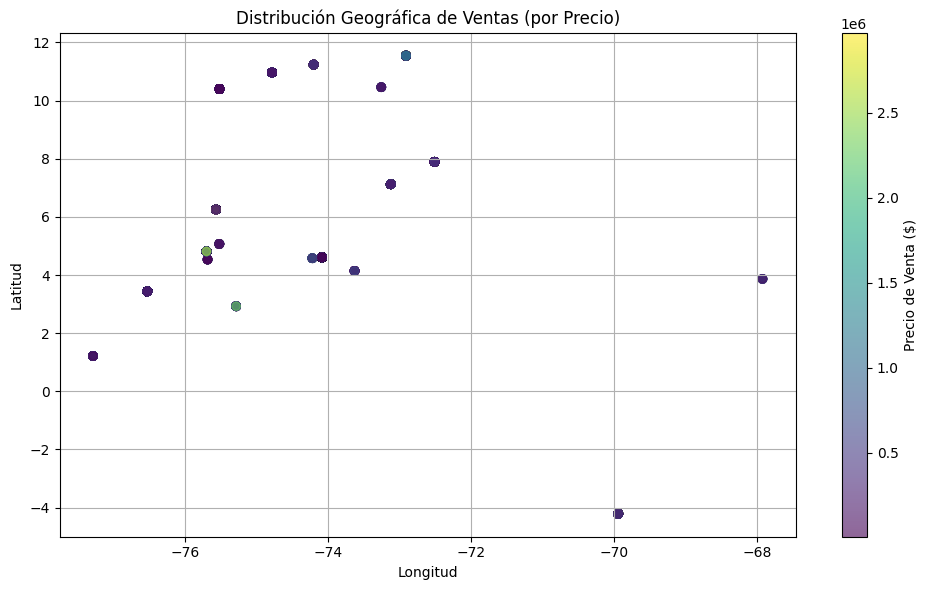

In [36]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_total['lon'], df_total['lat'],
                      c=df_total['Precio'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Precio de Venta ($)')
plt.title('Distribución Geográfica de Ventas (por Precio)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.tight_layout()
plt.show()

Con este mapa podemos interactuar con la densidad de ventas por ubicación y ver zonas calientes 🟡🟠🔴.

In [37]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en promedio de coordenadas
mapa = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=6)

# Crear lista de puntos para heatmap
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_total.iterrows()]

# Añadir heatmap al mapa
HeatMap(heat_data, radius=15).add_to(mapa)

# Mostrar mapa
mapa